In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [5]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,205436.000000,205439.000000,205431.000000,205431.000000,204997.000000,2.054390e+05,2.054360e+05
mean,98177.971870,2020.960363,52.164342,922.670532,28.970848,2.277156e+08,5.297704e+10
std,2419.037479,2.989059,88.075859,7761.753602,14.910052,7.205737e+07,1.588435e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.935324e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.382368e+08,5.303303e+10
75%,98372.000000,2023.000000,48.000000,0.000000,42.000000,2.618718e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [6]:
make_model_distribution = data.groupby(['Make', 'Model']).size().reset_index(name='Count')

make_model_distribution = make_model_distribution.sort_values(by='Count', ascending=False)

In [7]:
make_model_distribution

,Make,Model,Count
133,TESLA,MODEL Y,43437
130,TESLA,MODEL 3,32113
113,NISSAN,LEAF,13488
131,TESLA,MODEL S,7881
37,CHEVROLET,BOLT EV,6727
...,...,...,...
4,AUDI,A8 E,2
119,RAM,PROMASTER 3500,2
39,CHEVROLET,S-10 PICKUP,1
115,PORSCHE,918,1


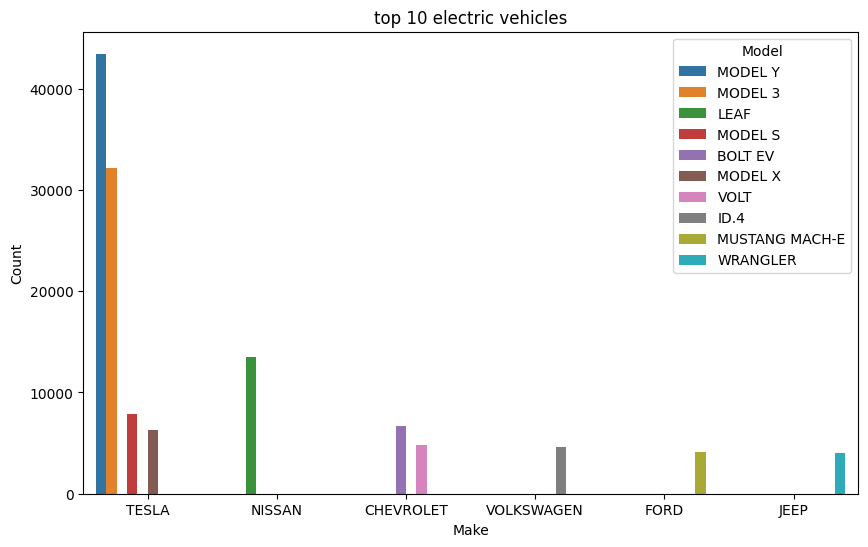

In [8]:
top_10=make_model_distribution.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Make', y='Count', hue='Model',data=top_10)
plt.title('top 10 electric vehicles')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

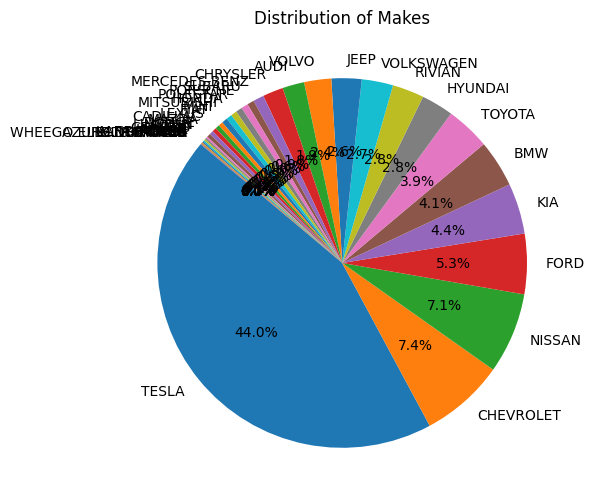

In [9]:
make_distibution=data['Make'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(make_distibution, labels=make_distibution.index,  autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Makes')
plt.show()

In [10]:
make_range_hsitogram = data.groupby(['Electric Range']).size().reset_index(name='Count')

make_range_hsitogram = make_range_hsitogram.sort_values(by='Count', ascending=False)

In [11]:
make_range_hsitogram

,Electric Range,Count
0,0.0,114172
83,215.0,6426
26,32.0,4895
19,25.0,4429
15,21.0,4220
...,...,...
5,11.0,4
52,74.0,4
61,95.0,3
45,57.0,2


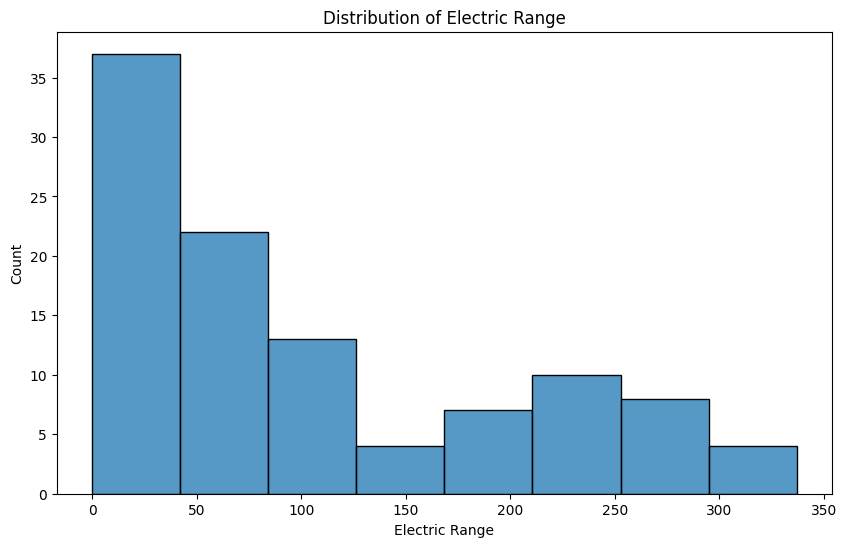

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Electric Range', data=make_range_hsitogram)
plt.title('Distribution of Electric Range')
plt.show()


In [32]:
state_distribution = data.groupby('State').size().reset_index(name='Count')

state_distribution = state_distribution.sort_values(by='Count', ascending=False)

In [37]:
import plotly.express as px
fig = px.choropleth(state_distribution,
                    locations='State',
                    locationmode='USA-states',
                    color='Count',
                    color_continuous_scale='Blues',
                    scope='usa',
                    labels={'Count': 'Number of Vehicles'},
                    title='Geographical Distribution of Electric Vehicles by State')

fig.show()

In [35]:
types_vicheal=data.groupby('Electric Vehicle Type').size().reset_index(name='Count')
types_vicheal=types_vicheal.sort_values(by='Count', ascending=False)

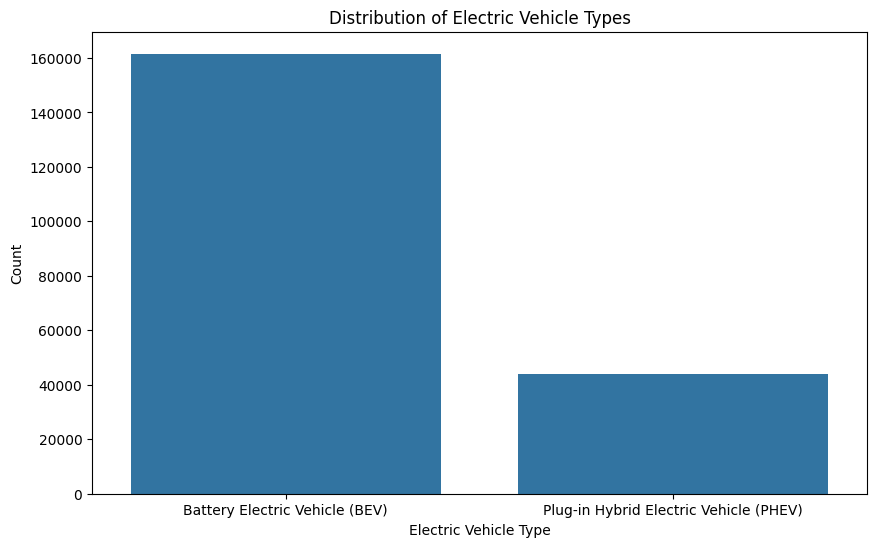

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Electric Vehicle Type', y='Count', data=types_vicheal)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.show()  

In [38]:
postal_code_distribution = data.groupby('Postal Code').size().reset_index(name='Count')

postal_code_distribution = postal_code_distribution.sort_values(by='Count', ascending=False)

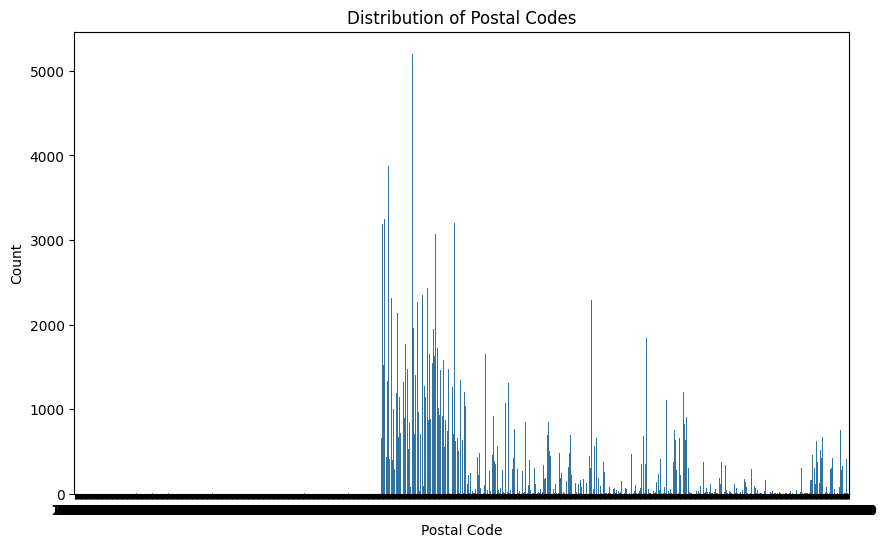

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Postal Code', y='Count', data=postal_code_distribution)
plt.title('Distribution of Postal Codes')
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.show()

In [46]:
census_tract_distribution = data.groupby('2020 Census Tract').size().reset_index(name='Count')

census_tract_distribution = census_tract_distribution.sort_values(by='Count', ascending=False)

C:\Users\youss\AppData\Local\Temp\ipykernel_37044\3895257939.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




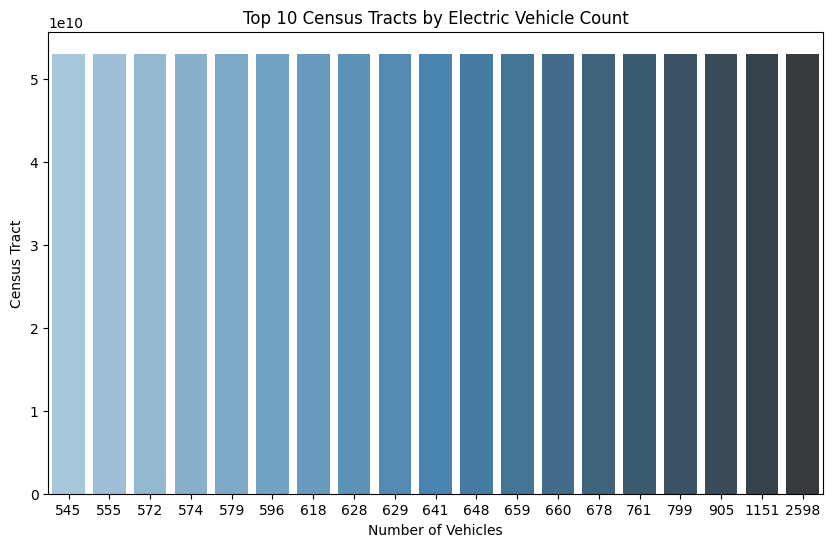

In [48]:
top_10_tracts = census_tract_distribution.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='2020 Census Tract', data=top_10_tracts, palette='Blues_d')
plt.title('Top 10 Census Tracts by Electric Vehicle Count')
plt.xlabel('Number of Vehicles')
plt.ylabel('Census Tract')
plt.show()

In [49]:
electric_utilit=data.groupby('Electric Utility').size().reset_index(name='Count')
electric_utilit=electric_utilit.sort_values(by='Count', ascending=False)

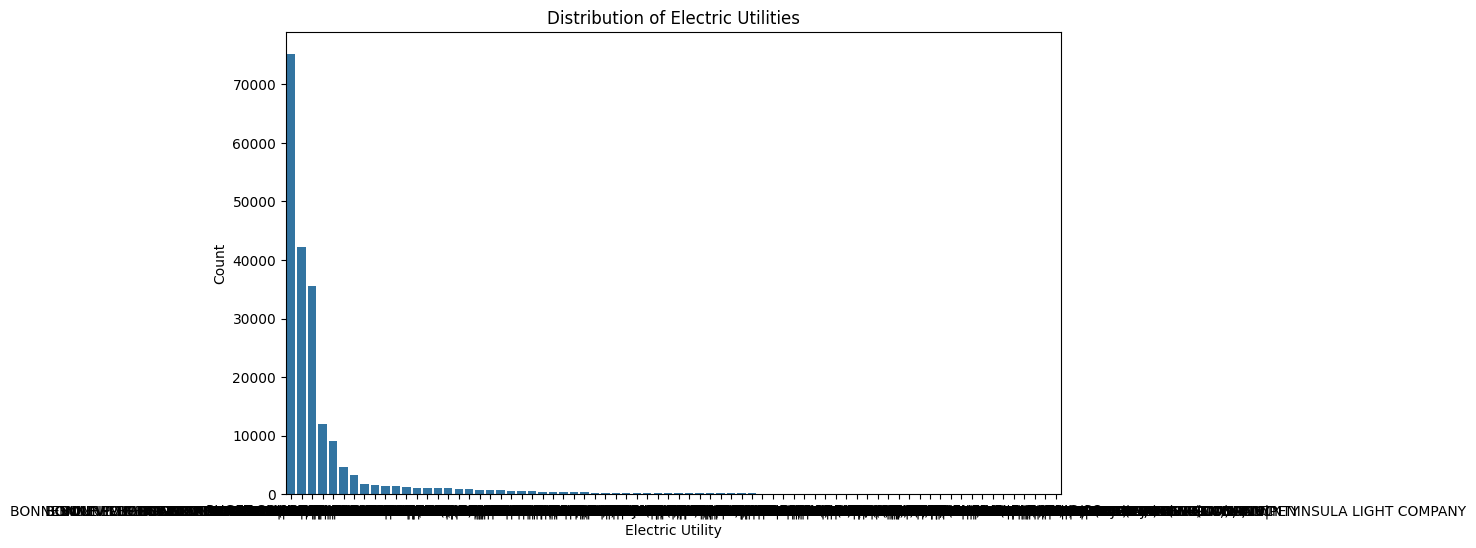

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Electric Utility', y='Count', data=electric_utilit)
plt.title('Distribution of Electric Utilities')
plt.xlabel('Electric Utility')
plt.ylabel('Count')
plt.show()

In [51]:

make_model_range = data.groupby(['Make', 'Model'])['Electric Range'].mean().reset_index()

make_model_range = make_model_range.sort_values(by='Electric Range', ascending=False)


In [53]:
make_model_range

,Make,Model,Electric Range
69,HYUNDAI,KONA,258.000000
134,TESLA,ROADSTER,229.285714
74,JAGUAR,I-PACE,203.185185
131,TESLA,MODEL S,173.229159
37,CHEVROLET,BOLT EV,168.867846
...,...,...,...
38,CHEVROLET,EQUINOX EV,0.000000
36,CHEVROLET,BOLT EUV,0.000000
35,CHEVROLET,BLAZER EV,0.000000
34,CADILLAC,LYRIQ,0.000000


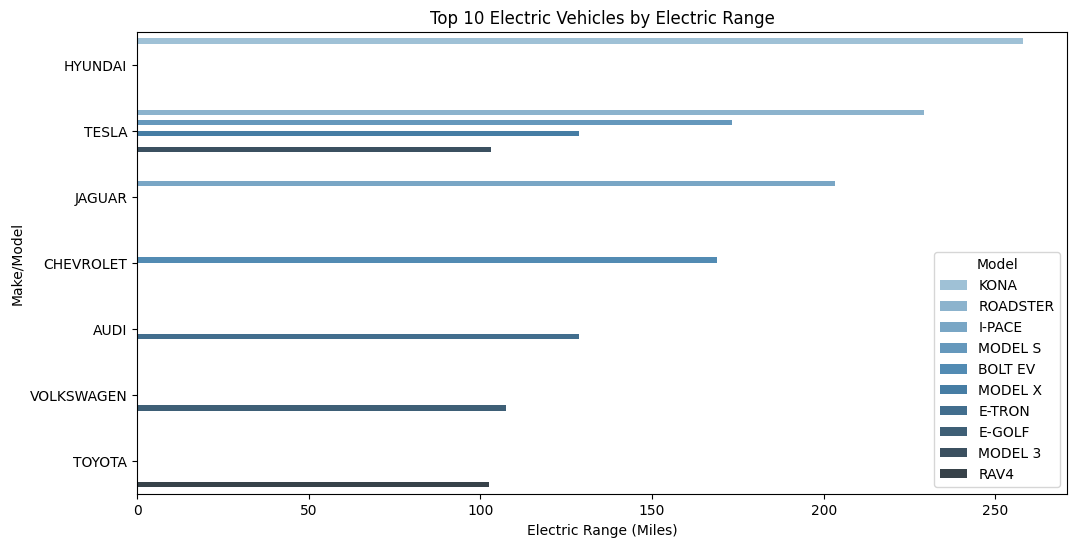

In [52]:
top_10_models = make_model_range.head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Electric Range', y='Make', hue='Model', data=top_10_models, palette='Blues_d')
plt.title('Top 10 Electric Vehicles by Electric Range')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Make/Model')
plt.show()

In [54]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         8
Base MSRP                                              8
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

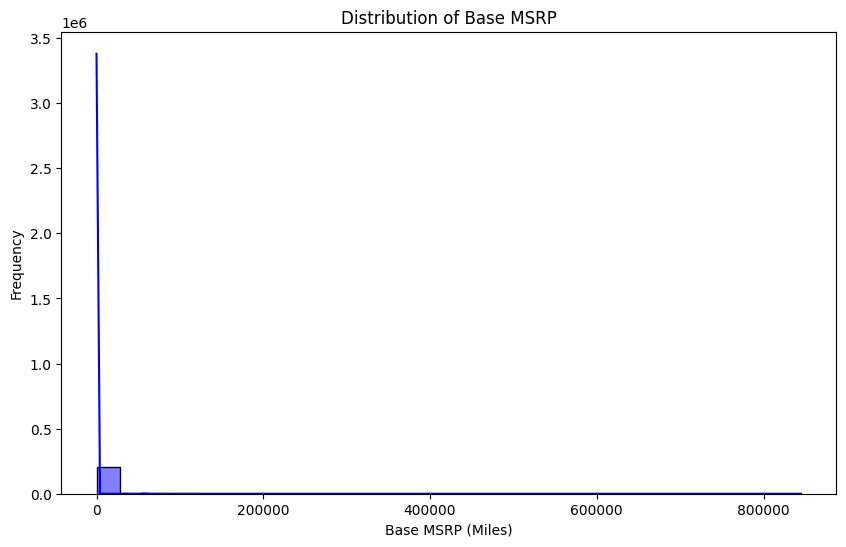

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Base MSRP'], kde=True, color='blue', bins=30)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP (Miles)')
plt.ylabel('Frequency')
plt.show()

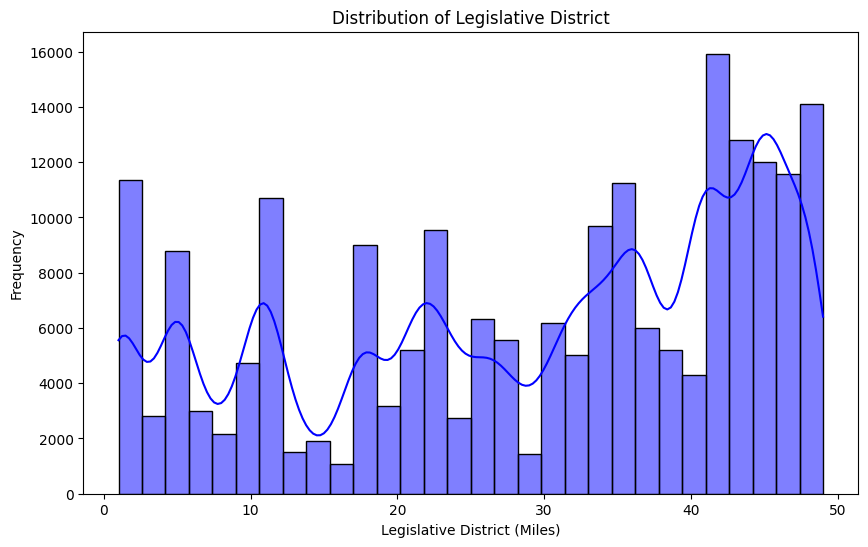

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Legislative District'], kde=True, color='blue', bins=30)
plt.title('Distribution of Legislative District')
plt.xlabel('Legislative District (Miles)')
plt.ylabel('Frequency')
plt.show()

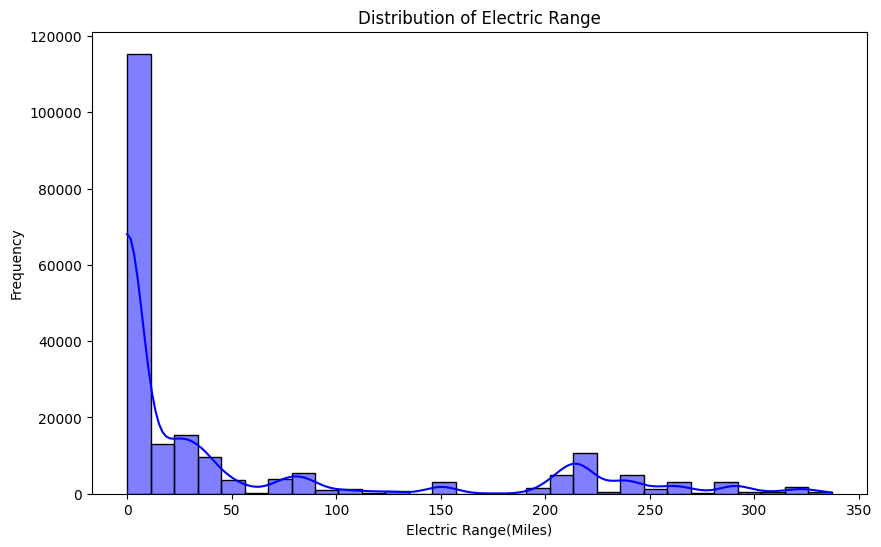

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Electric Range'], kde=True, color='blue', bins=30)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range(Miles)')
plt.ylabel('Frequency')
plt.show()

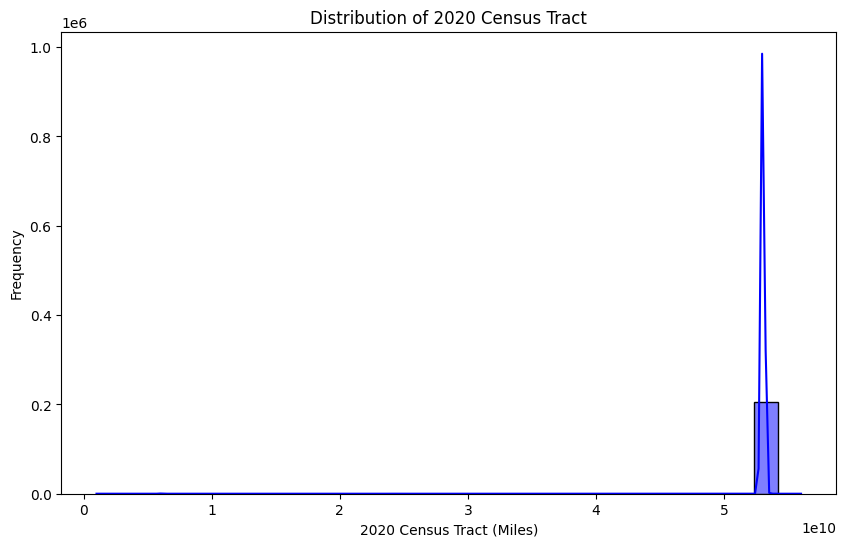

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data['2020 Census Tract'], kde=True, color='blue', bins=30)
plt.title('Distribution of 2020 Census Tract')
plt.xlabel('2020 Census Tract (Miles)')
plt.ylabel('Frequency')
plt.show()

Feature engineering and cleaning

In [63]:
mode_country = data['County'].mode()[0]
mode_city=data['City'].mode()[0]
mode_electric_utility=data['Electric Utility'].mode()[0]
mode_model=data['Model'].mode()[0]

data['County'].fillna(mode_country, inplace=True)
data['City'].fillna(mode_city, inplace=True)
data['Electric Utility'].fillna(mode_electric_utility, inplace=True)
data['Model'].fillna(mode_model, inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_37044\3790834557.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\youss\AppData\Local\Temp\ipykernel_37044\3790834557.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [65]:
mode_postal_code=data['Postal Code'].mode()[0]
data['Postal Code'].fillna(mode_postal_code, inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_37044\1731671474.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [68]:
mode_location=data['Vehicle Location'].mode()[0]
data['Vehicle Location'].fillna(mode_location, inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_37044\3140410505.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [69]:
median_msrp=data['Base MSRP'].median()
median_range=data['Electric Range'].median()
median_2020=data['2020 Census Tract'].median()
median_legislative=data['Legislative District'].median()
data['Base MSRP'].fillna(median_msrp, inplace=True)
data['Electric Range'].fillna(median_range, inplace=True)
data['2020 Census Tract'].fillna(median_2020, inplace=True)
data['Legislative District'].fillna(median_legislative, inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_37044\526461418.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\youss\AppData\Local\Temp\ipykernel_37044\526461418.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [73]:
#get object data
object_data=[]
for i in data.columns:
    if data[i].dtypes=="object":
        object_data.append(i)
object_data

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Vehicle Location',
 'Electric Utility']

In [74]:
data_number=data.drop(object_data, axis=1)

In [75]:
def detect_outliers_iqr(df):
    outliers_indices = []
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = np.percentile(df[column], 25)
            Q3 = np.percentile(df[column], 75)
            IQR = Q3 - Q1
            outlier_step = 1.5 * IQR
            outliers = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
            outliers_indices.extend(outliers)
    return list(set(outliers_indices))

# Detect outliers
outliers_indices = detect_outliers_iqr(data_number)
print(f'Number of outliers detected: {len(outliers_indices)}')

Number of outliers detected: 53706


In [79]:
data_cleaned = data.drop(outliers_indices).reset_index(drop=True)
